# Mounting Drive 

### Connecting to our group folders data

In [ ]:
# This is to help connect this jupyter notebook to our data that is in google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
# Importing the necessary libraries that you need
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [ ]:
# This will change the directory straight to the google drive "DATA" folder
PATH = 'drive/MyDrive/Credit Line Increase Competition21/data'

data_paths = os.listdir(PATH)
os.chdir(PATH)

data_paths

['ucf_unsecured_debt.csv',
 'ucf_PSCU_UCF_2021_Data.csv',
 '20211104_APPEND_ucf_rates_history.csv',
 '20211104_APPEND_ucf_bureau_score_history.csv',
 '2021_2022_ucf_field_definitions.docx',
 'full_df.csv',
 'final_increases.csv']

# Reading in the processed df

-----------

In [ ]:
# Reading in the processed table
df = pd.read_csv('full_df.csv', index_col = 0)
df.head()

,ucfID,lifetime_delinquent_1_cycle_count,lifetime_delinquent_2_cycles_count,card_open_date,credit_line_last_change_date,last_purchase_date,last_cash_advance_date,last_transaction_date,year_to_date_return_check_count,year_to_date_cash_advance_count,year_to_date_cash_advance_amount,year_to_date_purchase_net_count,year_to_date_purchase_net_amount,year_to_date_average_daily_balance_amount,year_to_date_unpaid_billed_interest_amount,credit_line_amount,year_to_date_purchase_interest_amount,previous_year_reportable_interest_amount,previous_year_unpaid_billed_interest_amount,purchase_transaction_net_count,historical_dispute_count,n_loans,sumLoanDebt,n_credit_cards,sumCreditLimit,tot_Unsec_Debt,recent_cred_score,avg_score_5_yrs,credit_line_Rate,overlimit_binary,cash_advance_3_yrs,cash_advance_7_yrs,avg_annual_historical_dispute,avg_annual_delinquent_1_cycle,avg_annual_delinquent_2_cycle,avg_perc_credit_used,perc_change_credit_score
0,000156E1-0152-4D92-B1D9-6D37B24763C9,3,0,2779,1049.0,1.0,2235.0,58.0,0,24.0,6664.49,17.0,696.95,395.18,0.00,26000.0,12.55,0.00,0.00,34.0,0.0,0.0,0.00,0.0,0.0,0.00,769.0,720,8.75,0,0.0,1.0,0.0,0.394027,0.0,0.015199,6.805556
1,0001B18E-3807-46AC-943C-37C1B968BBD5,2,0,1589,1598.0,1.0,1584.0,54.0,0,47.0,11266.71,17.0,754.70,6481.75,71.91,8000.0,146.82,858.10,76.84,106.0,0.0,0.0,0.00,0.0,0.0,0.00,624.0,648,17.75,0,0.0,1.0,0.0,0.459408,0.0,0.810219,-3.703704
2,0003AD69-81F6-4CE2-8620-D233E2D5C8D4,1,0,2911,76.0,1293.0,559.0,559.0,0,101.0,75694.24,0.0,0.00,8072.94,15.84,10000.0,0.00,228.26,6.77,467.0,0.0,2.0,23831.67,0.0,0.0,23831.67,686.0,727,9.75,0,1.0,1.0,0.0,0.125386,0.0,0.807294,-5.639615
3,0006A937-F473-450F-87F3-0DF09EE6B3ED,0,0,1948,1049.0,635.0,1072.0,636.0,0,43.0,13075.94,0.0,0.00,0.00,0.00,4500.0,0.00,47.65,15.04,232.0,0.0,0.0,0.00,1.0,4500.0,4500.00,807.0,812,8.75,0,1.0,1.0,0.0,0.000000,0.0,0.000000,-0.615764
4,000917CA-9984-40F5-85B4-2718686AE4C2,0,0,3150,532.0,1.0,3138.0,52.0,0,76.0,11598.73,52.0,1600.02,220.20,0.00,8000.0,0.00,0.00,0.00,214.0,0.0,0.0,0.00,1.0,5000.0,5000.00,704.0,784,14.25,0,0.0,0.0,0.0,0.000000,0.0,0.027525,-10.204082


# Feature Signifiance

We will be running the split finding algorithm, XGB, to find feature importance for a set of outcome variables.

For example, which variables are the most significant for predicting an overlimit, having a historical dispute, etc...



Text(0.5, 1.0, 'Top n Predictors for Overlimit')

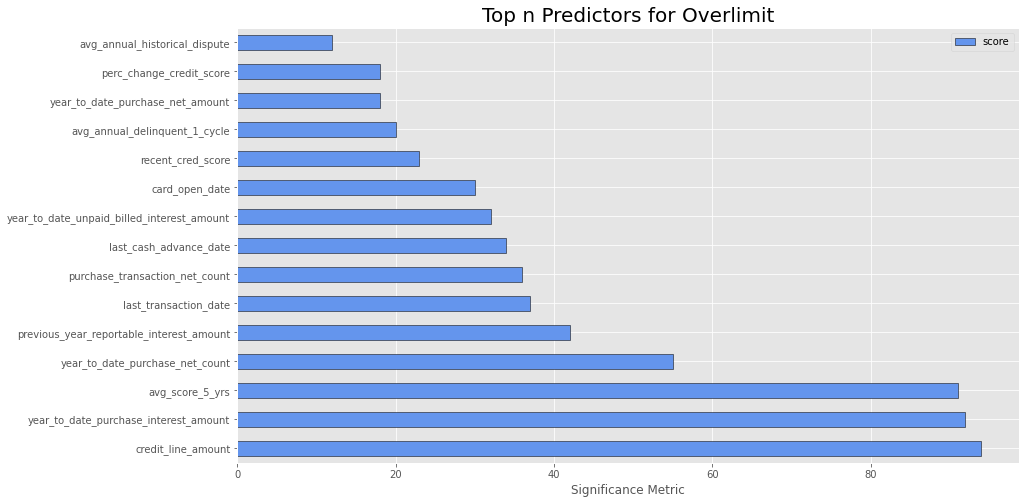

In [ ]:
x = df.drop(['ucfID', 'overlimit_binary', 'avg_perc_credit_used', 
             'year_to_date_average_daily_balance_amount', 'credit_line_Rate'], axis = 1)
y1 = df['overlimit_binary']

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=0)
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_overlimit = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_overlimit.nlargest(15, columns="score").plot(kind='barh', figsize = (14,8), color = 'cornflowerblue', edgecolor='black') 
plt.xlabel('Significance Metric')
plt.title('Top n Predictors for Overlimit', size = 20)

[00:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


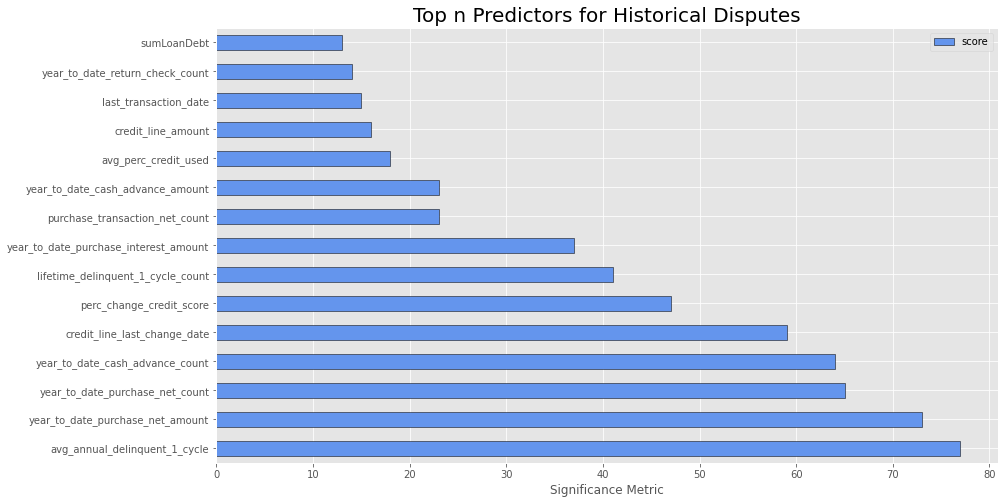

In [ ]:
# dispute and any columns made to calculate historical dispute
x = df.drop(['ucfID', 'avg_annual_historical_dispute', 'historical_dispute_count', 
             'card_open_date', 'credit_line_Rate'], axis = 1)
y1 = df['avg_annual_historical_dispute']

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=0)
# fit model no training data
model = XGBRegressor()
model.fit(x_train, y_train)
# make predictions for test data

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_dispute = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_dispute.nlargest(15, columns="score").plot(kind='barh', figsize = (14,8), color = 'cornflowerblue', edgecolor='black') 
plt.xlabel('Significance Metric')
plt.title('Top n Predictors for Historical Disputes', size = 20)
plt.show()

[00:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


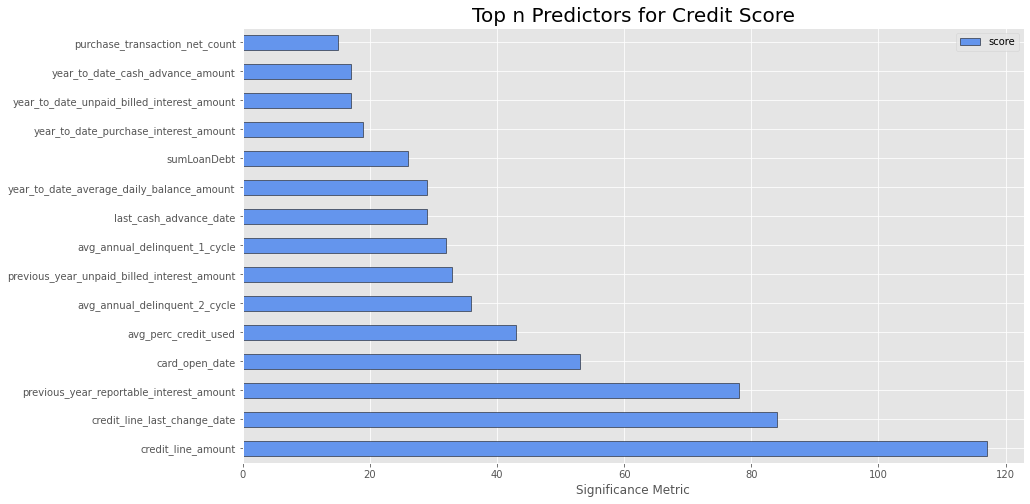

In [ ]:
# CREDIT SCORE take out any relating credit score columns
x = df.drop(['ucfID', 'recent_cred_score', 'avg_score_5_yrs', 'perc_change_credit_score',
             'credit_line_Rate'], axis = 1)
y1 = df['recent_cred_score']

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=0)
# fit model no training data
model = XGBRegressor()
model.fit(x_train, y_train)
# make predictions for test data

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_delinquint2 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_delinquint2.nlargest(15, columns="score").plot(kind='barh', figsize = (14,8), color = 'cornflowerblue', edgecolor='black') 
plt.xlabel('Significance Metric')
plt.title('Top n Predictors for Credit Score', size = 20)
plt.show()

[00:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


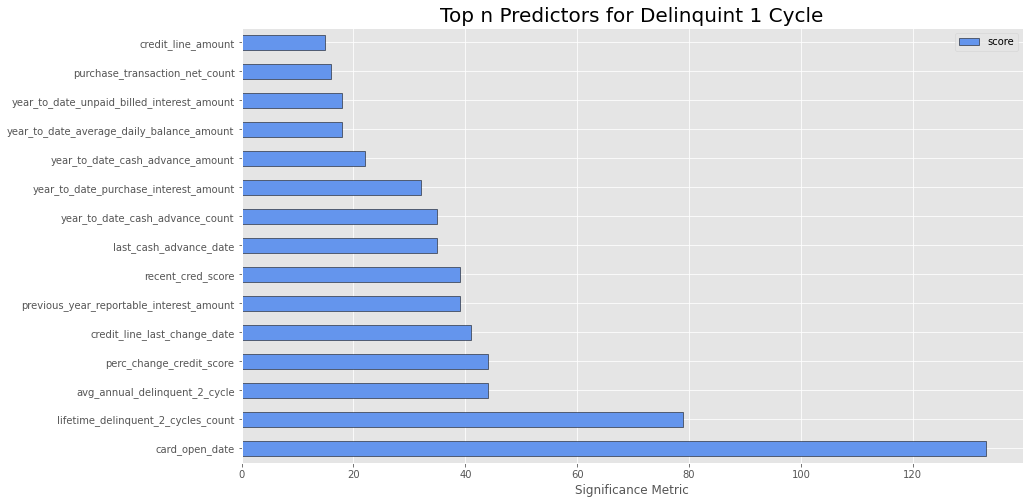

In [ ]:
# CREDIT SCORE take out any relating credit score columns
x = df.drop(['ucfID', 'lifetime_delinquent_1_cycle_count', 'avg_annual_delinquent_1_cycle',
             'credit_line_Rate'], axis = 1)
y1 = df['lifetime_delinquent_1_cycle_count']

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=0)
# fit model no training data
model = XGBRegressor()
model.fit(x_train, y_train)
# make predictions for test data

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_delinquint1 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_delinquint1.nlargest(15, columns="score").plot(kind='barh', figsize = (14,8), color = 'cornflowerblue', edgecolor='black') 
plt.xlabel('Significance Metric')
plt.title('Top n Predictors for Delinquint 1 Cycle', size = 20)
plt.show()

[00:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


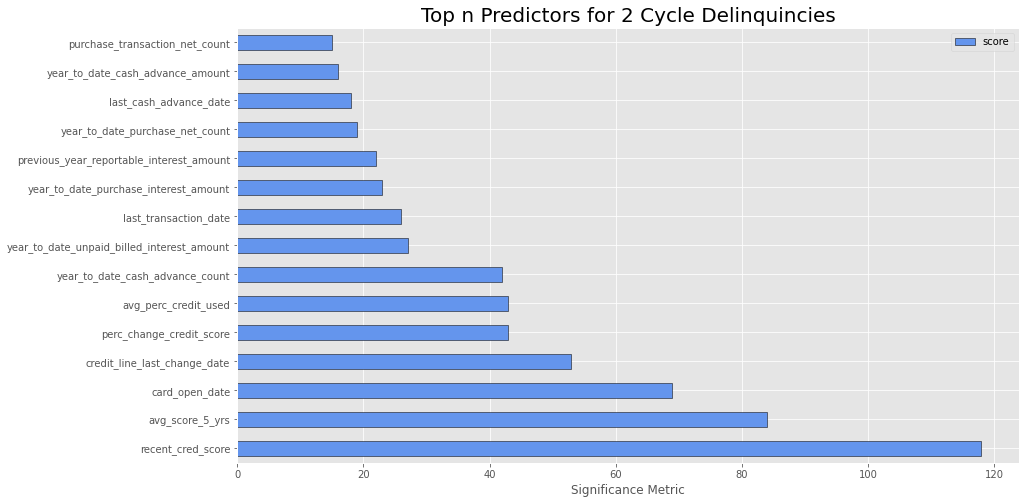

In [ ]:
# Take out life 1 cycle and 2 cycle 
x = df.drop(['ucfID','avg_annual_delinquent_1_cycle', 'avg_annual_delinquent_2_cycle', 
             'lifetime_delinquent_1_cycle_count', 'lifetime_delinquent_2_cycles_count', 
             'credit_line_Rate'], axis = 1)
y1 = df['avg_annual_delinquent_2_cycle']

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=0)
# fit model no training data
model = XGBRegressor()
model.fit(x_train, y_train)
# make predictions for test data

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_delinquint2 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_delinquint2.nlargest(15, columns="score").plot(kind='barh', figsize = (14,8), color = 'cornflowerblue', edgecolor='black') 
plt.xlabel('Significance Metric')
plt.title('Top n Predictors for 2 Cycle Delinquincies', size = 20)
plt.show()

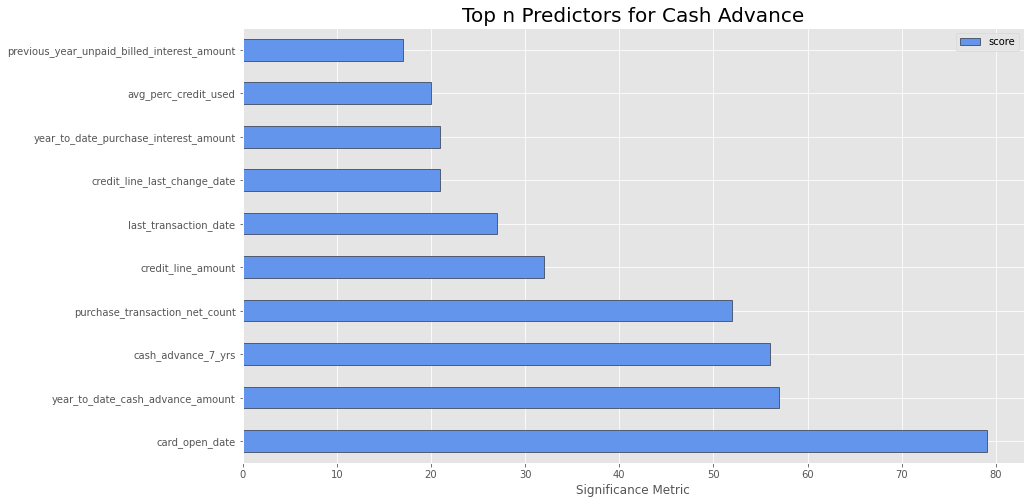

In [ ]:
# CREDIT SCORE take out any relating credit score columns
x = df.drop(['ucfID', 'cash_advance_3_yrs', 'last_cash_advance_date', 'credit_line_Rate'], axis = 1)
y1 = df['cash_advance_3_yrs']

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=0)
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data_advance = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_advance.nlargest(10, columns="score").plot(kind='barh', figsize = (14,8), color = 'cornflowerblue', edgecolor='black') 
plt.xlabel('Significance Metric')
plt.title('Top n Predictors for Cash Advance', size = 20)
plt.show()

# Variable Selection Method

We will be using XGB to help assess which variables are most important in prediciting crucial variables that we have. We ran different regression and classification trees against each of those variables and are taking the 10 most significant predictors of each model to help with variable selection. 

This is an automatic procedure, but we will still need to later hand select which variables to remove, due to our scoring matrix we have in mind.

In [ ]:
df.shape

(22222, 37)

In [ ]:
# These will be columns we will definitely need to include in our model
definitive_cols = ['ucfID', 'credit_line_amount', 'recent_cred_score', 'lifetime_delinquent_1_cycle_count', 
                   'avg_annual_delinquent_2_cycle', 'avg_annual_historical_dispute', 'cash_advance_3_yrs',
                   'overlimit_binary', 'credit_line_Rate', 'avg_perc_credit_used', 
                   'year_to_date_average_daily_balance_amount', 'historical_dispute_count', 
                   'card_open_date', 'avg_score_5_yrs', 'perc_change_credit_score', 
                   'lifetime_delinquent_2_cycles_count']

# The top 10 predictors for each XGB model
signficant_cols = np.concatenate((data_overlimit.index[:10].values, 
                                  data_delinquint2.index[:10].values,
                                  data_dispute.index[:10].values,
                                  data_advance.index[:10].values,
                                  definitive_cols))

# Putting the significant features into a df
significant_df = pd.DataFrame({'important_feats': signficant_cols})
# Only taking unique values so no repeats show up
columns = np.unique(significant_df['important_feats'].values)

We have finished the automatic variable selection feature. We originally started with 37 columns and have successfully reduced it to 30 columns. Although it doesn't seem like much, this helps us know which variables still have some kind of relevance. We were also generous with picking the top 10 predictors for each model, but we could have very well changed it to top 3/top 5.

# User Increase Filtering

Our methodology for modeling is we are going to filter out any "negative cases" of customers. Being a credit lender and especially a credit union, we would like to avoid risk as much as possible, while trying to maintain a balance of customer retention and risk aversion.

We have went through plenty of research and trial-and-error to come up with conditions that may be strict, but not penalize user too harshly for a mistake they might have had in the past. 

Looking to automate and make the credit increase process more efficient, we have to include users that have a card recently opened recently, had a credit line increase recently, and to make sure we don't surpass the $30,000 credit loaning that Addition Finance offers. 

This model is strongly influenced by the fact we have historical customer data. Since Addition is an established credit union of many years and possessing credit history for their customer base, we are able to use this data-centric approach in filtering out many customers based off of user history and create a data-driven way to increase credit limits

In [ ]:
def IncreaseConditions(table):
  """ No Increase Conditions

  Applying multiple conditioning on a dataframe to find users that fall into the 
  'No Credit Increase' category.

  If they have ...
  - credit_bureau_score               <   660
  - avg_credit_score_5_yrs            <   660
  - card_open_date                    <   365/2
  - avg_perc_credit_used              >   .40
  - avg_annual_historical_dispute     >   1/2
  - avg_annual_delinquent_1_cycle     >   1/2
  - avg_annual_delinquent_2_cycle     >   1/5
  - overlimit_binary                  =   1   
  - credit_line_amount                >=  30000
  - unpaid_billed_interest            >   avg_daily_balance * credit_line_Rate
  - credit_line_last_change_date      <   365/2
  - year_to_date_purchase_net_count   =   0
  - last_transaction_date             >   365/2

  """

  table.index = table['ucfID']

  a = (table['recent_cred_score'] < 660)
  b = (table['avg_score_5_yrs'] < 660)
  c = (table['card_open_date'] < 365/2)
  d = (table['avg_perc_credit_used'] > .40)
  e = (table['avg_annual_historical_dispute'] > 1)
  f = (table['avg_annual_delinquent_1_cycle'] > 1/2)
  g = (table['avg_annual_delinquent_2_cycle'] > 1/5)
  h = (table['overlimit_binary'] == 1)
  i = (table['credit_line_amount'] >= 30000)
  j = (table['year_to_date_unpaid_billed_interest_amount']/(table['avg_perc_credit_used']*table['credit_line_amount']) > table['credit_line_Rate']/100)
  k = (table['credit_line_last_change_date'] < 365/2)
  l = (table['year_to_date_purchase_net_count'] == 0)
  m = (table['last_transaction_date'] > 365/2)

  no_increase = table.loc[a | b | c | d | e | f | g | h | i | j | k | l | m, :]

  yes_increase = np.setdiff1d(table['ucfID'], no_increase.index)
  users_pass = table.loc[table.index.isin(yes_increase), :]
  users_pass.drop(['ucfID'], axis = 1, inplace = True)

  return users_pass

def testingIncrease(table):
  """ Applying a baseline condition of Users that get a credit line increase
  Mainly looking at credit score
  
  Without conditioning on other variables, our baseline for users that fall into
  'Yes Credit Increase' category.

  If they have ...
  - credit_bureau_score               >=   675
  - card_open_date                    <   365/2
  - credit_line_amount                <   30000
  - year_to_date_purchase_net_amount  >   0
  - credit_line_last_change_date      >=  365/2
  - year_to_date_purchase_net_count   >   0
  - last_transaction_date             <=  365/2

  """

  a = (table['recent_cred_score'] >= 675)
  b = (table['card_open_date'] >= 365/2)
  c = (table['credit_line_amount'] < 30000)
  d = (table['credit_line_last_change_date'] >= 365/2)
  e = (table['year_to_date_purchase_net_count'] > 0)
  f = (table['last_transaction_date'] <= 365/2)
 
  return table.loc[a, :]

Using our baseline condition to see how many users would get a credit increase (Mainly looking at credit scores above 675)

Using our filtering method, about 13832 users of 22222 users will get filtered  out from the data for getting no increase

# Modeling Procedure

In [ ]:
def rounder(value):
  """ Custom credit limit rounding

  Helper function to later on round credit line increases

  """

  if (value < 300):
    return round(value/50.0)*50.0
  
  elif (value < 2000):
    return round(value/100.0)*100.0
  
  else:
    return round(value/250.0)*250.0

def credit_line_model(user_df, scoring_df):
  """ Full Credit Line Model

  Split each column into quantiles and group each user in respective quantile.
  Creating a scoring matrix filled with values between 0.1's and 1's 

  Input
  ---------------------------------
  :user_df: User's who we want to predict an increase
  :scoring_df: Original Customer Dataframe with historical data

  Output
  ---------------------------------
  :scoring_matrix: The scores of columns based off of historical customer data
  :bins: The respective bins that group 

  """

  # "Positive" columns 
  modeling_cols_pos = ['avg_score_5_yrs', 'card_open_date', 'recent_cred_score'] 

  # "Negative" columns
  modeling_cols_neg = ['avg_annual_delinquent_1_cycle', 'avg_annual_delinquent_2_cycle', 'avg_perc_credit_used', 
                       'year_to_date_unpaid_billed_interest_amount', 'previous_year_unpaid_billed_interest_amount', 
                       'avg_annual_historical_dispute', 'year_to_date_cash_advance_count']

  # Column names for scoring matrix
  matrix = ['avg_score_5_yrs_score',               #35 ch 
            'card_open_date_score',                #35 ch 
            'recent_cred_score_score',             #35 ch 
            'avg_annual_historical_dispute_score', #35 ch 
            'avg_annual_delinquent_1_cycle_score', #35 ph 
            'avg_annual_delinquent_2_cycle_score', #35 ph 
            'avg_perc_credit_used_score',          #35 ph
            'year_to_date_unpaid_billed_interest_amount_score', #30 ao 
            'previous_year_unpaid_billed_interest_amount_score', #30 ao 
            'year_to_date_cash_advance_count_score'] #30 ao 

  # Initializing bins and creating a temporary list
  bins = {}
  temp = [1.0]

  # Creating scores for positive columns
  for i in modeling_cols_pos:
    
    # Splits data into 10 quantiles and calculating bins
    x, y = pd.qcut(scoring_df.loc[:, i], q = 10, labels = np.arange(0.1, 1.1, 0.1), retbins=True)

    bins[i] = y

    # Grouping users into previous found quantile bin to find score
    user_df[f'{i}_score'] = pd.cut(user_df[i], bins = y, labels = np.arange(0.1, 1.1, 0.1), include_lowest=True)
  
  # Creating scores for negative columns
  for i in modeling_cols_neg:

    # Splits data into quantiles (not always a split of 10)
    x, y = pd.qcut(scoring_df.loc[:, i], q = 10, retbins=True, duplicates = 'drop')

    # If there are 10 quantiles, then use similar method to above, but negative scoring system
    if len(y) == 11:

      bins[i] = y

      user_df[f'{i}_score'] = pd.cut(user_df[i], bins = y, labels = np.arange(1.0, 0, -0.1), include_lowest=True)

    # Need to calculate a different negative scoring system for sparse columns
    else:

      bins[i] = y
      length_labels = len(y) - 2

      for j in range(length_labels):

        temp.append((length_labels -j)/10)
      # Scoring system for negative sparse column
      user_df[f'{i}_score'] = pd.cut(user_df[i], bins = y, labels = temp, include_lowest=True)
      
      temp = [1.0]

  return user_df[matrix].astype(np.float64), bins

def calculating_rates(scoring_matrix):
  """ Calculating Rates based off of linear combination with weighted columns

  This is a very customizeable weighing system we based on similar FICO scoring metrics.

  Could be a more data-driven way to pick weights, but this is what we felt was
  accurate for the time given.

  The max perfect_score% is chosen based off of average credit limit increases
  are generally between a 10%-25% increase. Since we are automatically increasing
  limits, then 20% seems to be a generous max amount.

  :scoring_matrix: Will be the output from credit_line_model() function

  """
  # Equates to the max x% credit line increase for "Ideal" users
  perfect_score = 20

  # Flexible weighing system
  weights = {'avg_score_5_yrs_score': 12.5,
          'card_open_date_score': 7.5,
          'recent_cred_score_score': 12.5,
          'avg_annual_historical_dispute_score': 2.5,
          'avg_annual_delinquent_1_cycle_score': 10,
          'avg_annual_delinquent_2_cycle_score': 15,
          'avg_perc_credit_used_score': 10,
          'year_to_date_unpaid_billed_interest_amount_score': 12.5,
          'previous_year_unpaid_billed_interest_amount_score': 12.5,
          'year_to_date_cash_advance_count_score': 5}

  # Creating a dataframe for ease of use
  rates = pd.DataFrame()

  # Array multiplication
  for i in list(weights.keys()):
    rates[f'{i}'] = weights[i] * scoring_matrix[i]

  return pd.DataFrame((rates.sum(axis = 1)/100)*perfect_score/100, columns=['Rates'])

def credit_line_increase(credit_rates_df, original_df):
  """ Calculate User's respective new credit limit

  Input
  ---------------------------------
  :credit_rates_df: Will be output from calculating_rates() function
  :original_df: First table where credit_line_amount is a present column

  Output
  ---------------------------------
  :credit_increase_df: Predicted Cred Increase, Current Cred Lim, New Cred Lim

  """

  # Calculates the credit line increase amount
  increases = pd.DataFrame(credit_rates_df['Rates'].values * 
                           original_df.loc[original_df['ucfID'].isin(credit_rates_df.index), :]['credit_line_amount'].values,
                           index = credit_rates_df.index, columns=['increase_amt'])
  
  # Inner join with original df to finalize credit line summation
  credit_increase_df = increases.merge(original_df, left_on = increases.index, 
                                       right_on = original_df['ucfID'], how = 'inner')[['ucfID', 'increase_amt', 'credit_line_amount']]
  # Custom rounding function
  credit_increase_df['increase_amt'] = credit_increase_df['increase_amt'].apply(rounder)

  # row summation to calculate all credit lines
  credit_increase_df['new_credit_line'] = credit_increase_df.sum(axis = 1).astype(np.float64)
  # Changing all credit lines above 30,000 to max at 30,000
  credit_increase_df.loc[credit_increase_df['new_credit_line'] >= 30000, 'new_credit_line'] = 30000

  return credit_increase_df


## The final results are shown below: 

In [ ]:
# filters out negative customers from our preprocessed dataframe
increase_customers = IncreaseConditions(df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# 1st parameter is a test dataset we want to use the model on
# 2nd parameter is the df with all historical data
# creates score matrix for your test dataset, and the bins chosen
full_df, full_bins = credit_line_model(increase_customers, increase_customers)

In [ ]:
# takes score matrix and does a linear combination with weights to obtain rates
full_rates = calculating_rates(full_df)

In [ ]:
full_rates.head()

,Rates
ucfID,
000156E1-0152-4D92-B1D9-6D37B24763C9,0.1295
000917CA-9984-40F5-85B4-2718686AE4C2,0.1405
000B584F-670C-4E0C-86D6-578002E96091,0.0830
0015BF1F-AB22-40B2-93A6-C76A6AA1F572,0.1795
00191672-A7C0-4BED-BAFF-5666A6DC10FC,0.1575


In [ ]:
# takes rates and will get output of predictions data frame 
full_table = credit_line_increase(full_rates, df)
full_table

,ucfID,increase_amt,credit_line_amount,new_credit_line
0,000156E1-0152-4D92-B1D9-6D37B24763C9,3250.0,26000.0,29250.0
1,000917CA-9984-40F5-85B4-2718686AE4C2,1100.0,8000.0,9100.0
2,000B584F-670C-4E0C-86D6-578002E96091,1000.0,12000.0,13000.0
3,0015BF1F-AB22-40B2-93A6-C76A6AA1F572,5250.0,29800.0,30000.0
4,00191672-A7C0-4BED-BAFF-5666A6DC10FC,2250.0,15000.0,17250.0
...,...,...,...,...
8389,FFEDB4D6-F556-43CE-94EB-ACC52D513722,3750.0,24000.0,27750.0
8390,FFEF33BB-1A08-4295-BA02-5A77EB893E11,2000.0,17000.0,19000.0
8391,FFF0A6EB-023C-4BEB-AA2D-E90B985A19F4,700.0,9500.0,10200.0
8392,FFF503F5-8FB5-4805-8D86-79A78B124C54,4000.0,26000.0,30000.0


In [ ]:
full_table.to_csv('predictions.csv')

# Model Analysis

### Visualization of Credit Line Increase Percentages

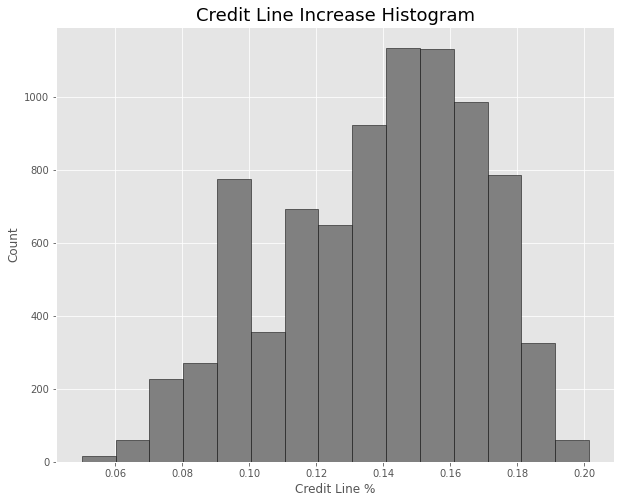

In [ ]:
fig, axs = plt.subplots(figsize = (10, 8))
axs.hist(full_table['increase_amt']/full_table['credit_line_amount'], bins = 15, 
         color = 'grey', edgecolor = 'black')
axs.set_title('Credit Line Increase Histogram', size = 18)
axs.set_xlabel('Credit Line %')
axs.set_ylabel('Count')
fig.savefig('CreditLineIncrease.png', dpi = 300)
fig.show()

# Running test case

Taking random sample of 10 users

In [ ]:
# Sample of 10 users
df_test = df.sample(n=10)
df_test.head()

,ucfID,lifetime_delinquent_1_cycle_count,lifetime_delinquent_2_cycles_count,card_open_date,credit_line_last_change_date,last_purchase_date,last_cash_advance_date,last_transaction_date,year_to_date_return_check_count,year_to_date_cash_advance_count,year_to_date_cash_advance_amount,year_to_date_purchase_net_count,year_to_date_purchase_net_amount,year_to_date_average_daily_balance_amount,year_to_date_unpaid_billed_interest_amount,credit_line_amount,year_to_date_purchase_interest_amount,previous_year_reportable_interest_amount,previous_year_unpaid_billed_interest_amount,purchase_transaction_net_count,historical_dispute_count,n_loans,sumLoanDebt,n_credit_cards,sumCreditLimit,tot_Unsec_Debt,recent_cred_score,avg_score_5_yrs,credit_line_Rate,overlimit_binary,cash_advance_3_yrs,cash_advance_7_yrs,avg_annual_historical_dispute,avg_annual_delinquent_1_cycle,avg_annual_delinquent_2_cycle,avg_perc_credit_used,perc_change_credit_score
ucfID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FA9E819F-C74F-4E10-9B65-78FAF77F4447,FA9E819F-C74F-4E10-9B65-78FAF77F4447,0,0,2420,715.0,1321.0,1549.0,1322.0,0,73.0,16171.73,0.0,0.00,0.00,0.00,21000.0,0.00,0.00,0.00,1.0,0.0,1.0,4597.43,1.0,21000.0,25597.43,794.0,830,8.75,0,0.0,1.0,0.00000,0.000000,0.0,0.000000,-4.337349
49246CE9-FDFD-4A08-B831-5B66BFB44384,49246CE9-FDFD-4A08-B831-5B66BFB44384,1,0,9158,1810.0,817.0,0.0,818.0,0,56.0,12092.42,0.0,0.00,0.00,0.00,28800.0,0.00,0.00,0.00,781.0,0.0,0.0,0.00,1.0,28800.0,28800.00,824.0,823,8.75,0,1.0,1.0,0.00000,0.039856,0.0,0.000000,0.121507
72501478-F98F-4D56-9200-79345CE719BB,72501478-F98F-4D56-9200-79345CE719BB,0,0,364,379.0,1.0,142.0,142.0,0,10.0,17254.12,0.0,0.00,12799.49,0.00,15000.0,0.00,145.77,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,673.0,621,12.25,1,1.0,1.0,0.00000,0.000000,0.0,0.853299,8.373591
36A3CB8E-932A-4349-BA69-809359C16265,36A3CB8E-932A-4349-BA69-809359C16265,0,0,11886,1049.0,1.0,459.0,61.0,0,51.0,2157.37,2.0,36.83,2418.58,18.51,25000.0,2.84,238.22,22.55,154.0,0.0,0.0,0.00,0.0,0.0,0.00,794.0,815,8.75,0,1.0,1.0,0.00000,0.000000,0.0,0.096743,-2.576687
7A589229-6750-497C-B354-D773D7970987,7A589229-6750-497C-B354-D773D7970987,0,0,1075,868.0,1.0,0.0,45.0,0,33.0,8495.83,4.0,912.12,425.45,0.00,800.0,9.81,0.50,0.00,63.0,2.0,0.0,0.00,0.0,0.0,0.00,601.0,646,16.25,0,1.0,1.0,0.67907,0.000000,0.0,0.531813,-6.965944


In [ ]:
# Filter out negative customers, df is original dataframe, this is our parameter table
param_table = IncreaseConditions(df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Filter out negative customers, for test dataset
df_test = IncreaseConditions(df_test)
df_test

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,lifetime_delinquent_1_cycle_count,lifetime_delinquent_2_cycles_count,card_open_date,credit_line_last_change_date,last_purchase_date,last_cash_advance_date,last_transaction_date,year_to_date_return_check_count,year_to_date_cash_advance_count,year_to_date_cash_advance_amount,year_to_date_purchase_net_count,year_to_date_purchase_net_amount,year_to_date_average_daily_balance_amount,year_to_date_unpaid_billed_interest_amount,credit_line_amount,year_to_date_purchase_interest_amount,previous_year_reportable_interest_amount,previous_year_unpaid_billed_interest_amount,purchase_transaction_net_count,historical_dispute_count,n_loans,sumLoanDebt,n_credit_cards,sumCreditLimit,tot_Unsec_Debt,recent_cred_score,avg_score_5_yrs,credit_line_Rate,overlimit_binary,cash_advance_3_yrs,cash_advance_7_yrs,avg_annual_historical_dispute,avg_annual_delinquent_1_cycle,avg_annual_delinquent_2_cycle,avg_perc_credit_used,perc_change_credit_score
ucfID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36A3CB8E-932A-4349-BA69-809359C16265,0,0,11886,1049.0,1.0,459.0,61.0,0,51.0,2157.37,2.0,36.83,2418.58,18.51,25000.0,2.84,238.22,22.55,154.0,0.0,0.0,0.0,0.0,0.0,0.0,794.0,815,8.75,0,1.0,1.0,0.0,0.0,0.0,0.096743,-2.576687
967932F5-A94C-4EDB-9E96-36AB1C9C979D,0,0,7057,715.0,1.0,0.0,51.0,0,79.0,27048.32,20.0,1964.64,261.79,0.00,27500.0,0.00,0.00,0.00,999.0,0.0,0.0,0.0,0.0,0.0,0.0,816.0,829,8.75,0,1.0,1.0,0.0,0.0,0.0,0.009520,-1.568154


In [ ]:
# Create scoring model with test_df and the parameter table
test_scores, _ = credit_line_model(df_test, param_table)

In [ ]:
# visualizing scores
test_scores


,avg_score_5_yrs_score,card_open_date_score,recent_cred_score_score,avg_annual_historical_dispute_score,avg_annual_delinquent_1_cycle_score,avg_annual_delinquent_2_cycle_score,avg_perc_credit_used_score,year_to_date_unpaid_billed_interest_amount_score,previous_year_unpaid_billed_interest_amount_score,year_to_date_cash_advance_count_score
ucfID,,,,,,,,,,
36A3CB8E-932A-4349-BA69-809359C16265,0.6,1.0,0.6,1.0,1.0,1.0,0.4,0.2,0.2,0.8
967932F5-A94C-4EDB-9E96-36AB1C9C979D,0.8,0.8,0.8,1.0,1.0,1.0,0.8,1.0,1.0,0.6


In [ ]:
# Rates increase for each user
test_rates = calculating_rates(test_scores)
test_rates

,Rates
ucfID,
36A3CB8E-932A-4349-BA69-809359C16265,0.126
967932F5-A94C-4EDB-9E96-36AB1C9C979D,0.179


In [ ]:
# Final credit line amount increase predictive table
credit_line_increase(test_rates, df)

,ucfID,increase_amt,credit_line_amount,new_credit_line
0,36A3CB8E-932A-4349-BA69-809359C16265,3250.0,25000.0,28250.0
1,967932F5-A94C-4EDB-9E96-36AB1C9C979D,5000.0,27500.0,30000.0


-----------------------------------------------------------------------------